# 10. 케라스를 사용한 인공 신경망 소개

In [2]:
# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)    
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 10.1 생물학적 뉴런에서 인공 뉴런까지

### 10.1.1 생물학적 뉴런

### 10.1.2 뉴런을 사용한 논리 연산

### 10.1.3 퍼셉트론

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [16]:
y_pred

array([0], dtype=int32)

### 10.1.4 다층 퍼셉트론과 역전파

### 10.1.5 회귀를 위한 다층 퍼셉트론

### 10.1.6 분류를 위한 다층 퍼셉트론

## 10.2 케라스로 다층 퍼셉트론 구현하기

### 10.2.1 텐서플로2 설치

In [20]:
!python3 -m pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/4e/d0/167c25cf115d6604adf11bb075a689dcb35bc5e351501e7dfdedef294498/tensorflow-2.13.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.13.0 from https://files.pythonhosted.org/packages/77/29/b3a46ade07623f29d64cb43433aa1c6ba2bfe7419daee76f0cc9a6f7213a/tensorflow_macos-2.13.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/40/fd/183c0aa70e74d967f490f4f45f12664ca2bcbb90

In [21]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.13.0'

### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [33]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [34]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [36]:
X_train_full.shape

(60000, 28, 28)

In [37]:
X_train_full.dtype

dtype('uint8')

In [38]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [39]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [42]:
class_names[y_train[0]]

'Coat'

In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.layers

In [49]:
hidden1 = model.layers[1]
hidden1.name

'dense_4'

In [50]:
model.get_layer('dense_4') is hidden1

True

In [51]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02798182, -0.07061184,  0.07272866, ..., -0.06682603,
         0.01572012,  0.05571625],
       [-0.04017713,  0.03170127,  0.05807632, ...,  0.02348082,
         0.0653677 , -0.02217487],
       [ 0.05519564,  0.00385298, -0.07054076, ..., -0.035425  ,
        -0.0279403 ,  0.02615411],
       ...,
       [-0.06610662, -0.018443  ,  0.00899649, ...,  0.05254635,
        -0.05425274,  0.01810506],
       [-0.06599399, -0.01828155, -0.03895479, ..., -0.05914423,
        -0.05209223, -0.01819508],
       [-0.03591083,  0.00874428,  0.05864984, ..., -0.06570977,
         0.01561415,  0.06900345]], dtype=float32)

In [52]:
weights.shape

(784, 300)

In [53]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [54]:
biases.shape

(300,)

In [55]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [56]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 972us/step - loss: 0.7002 - accuracy: 0.7719 - val_loss: 0.5138 - val_accuracy: 0.8202
Epoch 2/30
1719/1719 [==============================] - 2s 888us/step - loss: 0.4847 - accuracy: 0.8308 - val_loss: 0.4525 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 1s 855us/step - loss: 0.4420 - accuracy: 0.8444 - val_loss: 0.4408 - val_accuracy: 0.8504
Epoch 4/30
1719/1719 [==============================] - 2s 876us/step - loss: 0.4143 - accuracy: 0.8558 - val_loss: 0.4037 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 2s 897us/step - loss: 0.3952 - accuracy: 0.8611 - val_loss: 0.3855 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 2s 874us/step - loss: 0.3781 - accuracy: 0.8669 - val_loss: 0.3814 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 1s 852us/step - loss: 0.3659 - accuracy: 0.8710 - val_loss: 0.3731 -

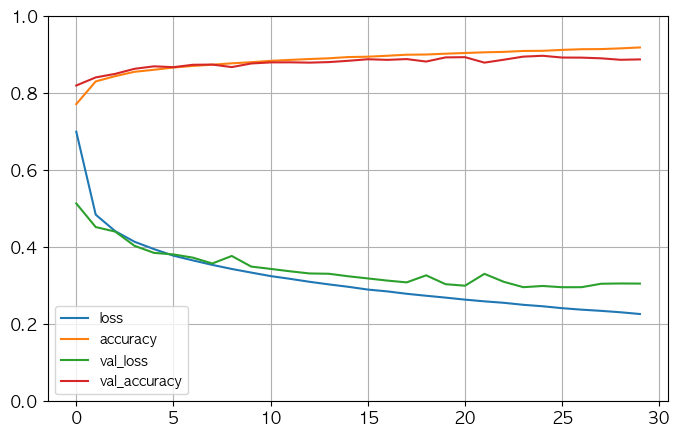

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 579us/step - loss: 0.3371 - accuracy: 0.8837


[0.33707091212272644, 0.8837000131607056]

In [62]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 67ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [68]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [69]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [70]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기